In [ ]:
import numpy as np

data=np.load('dataChestXray.npy')
target=np.load('targetChestXray.npy')
print(data.shape[1:])

(128, 128, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


C:\Users\pc877\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [ ]:
history=model.fit(train_data,train_target,epochs=8)

Epoch 1/8
149/149 ━━━━━━━━━━━━━━━━━━━━ 26s 150ms/step - accuracy: 0.8796 - loss: 0.3855
Epoch 2/8
149/149 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.8984 - loss: 0.3404
Epoch 3/8
149/149 ━━━━━━━━━━━━━━━━━━━━ 23s 152ms/step - accuracy: 0.8892 - loss: 0.3574
Epoch 4/8
149/149 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.8942 - loss: 0.3592
Epoch 5/8
149/149 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - accuracy: 0.8896 - loss: 0.3527
Epoch 6/8
149/149 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - accuracy: 0.8930 - loss: 0.3509
Epoch 7/8
149/149 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - accuracy: 0.8908 - loss: 0.3599
Epoch 8/8
149/149 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - accuracy: 0.8958 - loss: 0.3418


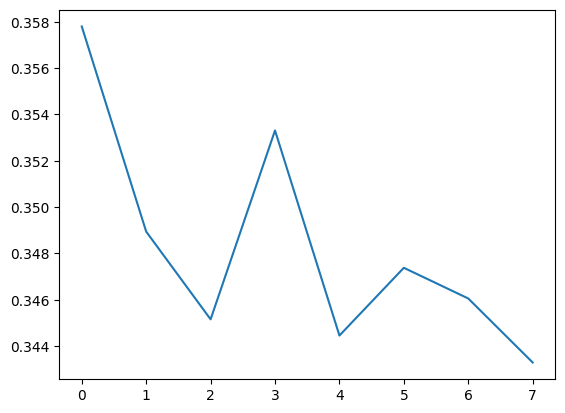

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

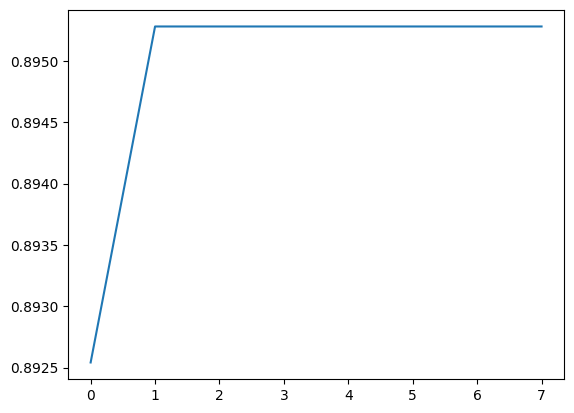

In [ ]:
plt.plot(history.history['accuracy'])

In [ ]:
print(model.evaluate(test_data,test_target))

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8953 - loss: 0.3384
[0.3439733386039734, 0.8930075764656067]


In [ ]:
model.save("ChestXRayPredictionsBepochsDropouts.h5")